In [ ]:
import pandas as pd
import glob
import numpy as np

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_files = r"/content/drive/MyDrive/Data_M/"

In [ ]:
data_hate = pd.read_pickle(f"{path_files}dataset_final.pkl")

In [ ]:
data_hate.head(10)

,tweet,lenght,labels
0,J'adore !! 👍👍,13,0
1,😂 donc disons tout seulement t'es un skynni,43,0
2,"Ah non, la violence de ce comeback..Il attenda...",180,1
3,Ville/Village : LEPETIT-PRESSIGNY,33,1
4,Encore une nuit sans dormir et je finis à 18h ...,58,1
5,Je regarde ses video en 1.75 ... T'es juste tr...,110,1
6,"Nous jeunesse africaine très consciente, avons...",255,0
7,"C'est la vie . Mais ce n'est pas la fin , et p...",75,0
8,#The_dream_of_Mars#elon_musk#doge#elon#mars#do...,197,1
9,Merde n’a pas aimé ma réflexion…😂 https://t.co...,81,0


In [ ]:
target= data_hate["labels"]

In [ ]:
encoded = np.load(f"{path_files}final_dataset_encoded.npy")

In [ ]:
X=encoded

Regression logistic+encodage bert

In [ ]:
model_lr = Pipeline([                                    
    ('classifier', LogisticRegression(C= 0.1, random_state=42,class_weight='balanced', max_iter= 10000))
])
  

In [ ]:
model_lr = Pipeline([                                   
    ('classifier', LogisticRegression(random_state=42,class_weight='balanced', max_iter= 10000))
])

In [ ]:
%%time
clf = model_lr.fit(X, target)

CPU times: user 23.3 s, sys: 1.55 s, total: 24.8 s
Wall time: 13 s


In [ ]:
%%time
cv_results = cross_validate(model_lr, X, target, cv=5)

CPU times: user 1min 34s, sys: 6.99 s, total: 1min 41s
Wall time: 52.3 s


In [ ]:
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score
0,9.205609,0.022333,0.952690
1,11.212885,0.016087,0.953737
2,10.391031,0.015960,0.956030
3,11.368282,0.016222,0.953099
4,10.066461,0.016088,0.948283


In [ ]:
cv_test_scores = cv_results['test_score']
print(
    "Moyenne du score:\n"
    f"{cv_test_scores.mean():.3f} +/- {cv_test_scores.std():.3f}"
)

Moyenne du score:
0.953 +/- 0.003


Très bons résultats avec la regression logistique avec un encodage Bert

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0, train_size = .75)

In [ ]:
%%time
y_pred = cross_val_predict(model_lr, X_test, y_test, cv=10)
conf_mat = confusion_matrix(y_test, y_pred)

CPU times: user 23.7 s, sys: 4.54 s, total: 28.2 s
Wall time: 20.7 s


In [ ]:
def draw_mat(conf_mat):
  matrice_proportions = np.zeros((2,2))
  for i in range(0,2):
      matrice_proportions[i,:] = conf_mat[i,:]/float(conf_mat[i,:].sum())
  names=['Neutre','Haineux']
  confusion_df = pd.DataFrame(matrice_proportions, index=names,columns=names)
  plt.figure(figsize=(5,5))
  sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
  plt.ylabel(r'Valeur réelle',fontsize=14)
  plt.xlabel(r'Valeur prédite',fontsize=14)
  plt.tick_params(labelsize=12)

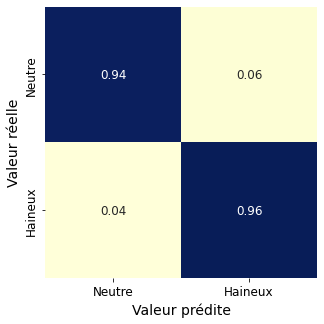

In [ ]:
draw_mat(conf_mat)

Tester le modèlesur les données du dataset 4k

In [ ]:
X_4k = np.load(f"{path_files}4k_dataset_encoded.npy")

In [ ]:
data_4k = pd.read_pickle(f"{path_files}dataset_fr/data_hate.pkl")

In [ ]:
data_4k.head()

,HITId,tweet,sentiment,text length,clean_tweet_min,clean_tweet_std,clean_tweet_lem
0,1,rt @user personnage ainsi q tte la clique gauc...,1,128,personnage ainsi q tte la clique gauchiste deg...,personnag tte cliqu gauchist deguis 1 macron!!...,personnage tout cliqu gauchiste deguise 1 macr...
1,2,@user @user @user bah oui t'as raison l'autre ...,1,62,bah oui t'as raison l'autre c'est un mongol.,raison mongol.,raison mongol.
2,3,moi j'ai personne à qui m'adresser pour réclam...,1,120,moi j'ai personne à qui m'adresser pour réclam...,m'adress réclam. voisin attard pu brui adminis...,me adresser réclamer. voisin attarder puant br...
3,4,@user @user c...est vrai que les anchois sont ...,0,102,c ... est vrai que les anchois sont aller sur ...,... vrai anchois aller lun invent million tech...,... vrai anchois aller lune invent million tec...
4,5,eh les renois faut se réveiller la @url,0,39,eh les renois faut se réveiller la,renois faut réveil,renois falloir réveiller


In [ ]:
y_4k= data_4k['sentiment']

In [ ]:
pred_4k = cross_val_predict(model_lr, X_4k, y_4k, cv=10)
conf_mat_4k = confusion_matrix(y_4k, pred_4k)

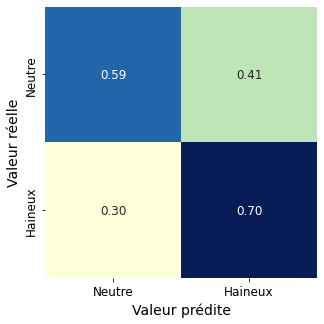

In [ ]:
draw_mat(conf_mat_4k)

Modèle à partir du dataset français

In [ ]:
result = model_lr.predict(X_4k)

In [ ]:
result=pd.DataFrame(result)

In [ ]:
conf_mat = confusion_matrix(y_4k, result)

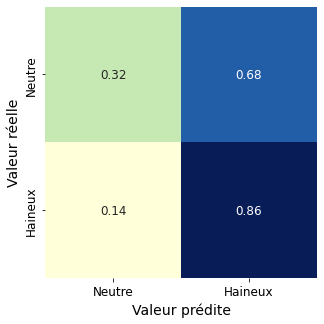

In [ ]:
draw_mat(conf_mat)

In [ ]:
clf.score(X_4k, y_4k)

0.7528649725959143

Nous remarquons que malgrès de très bonnes performance de la regression logistique sur les données de test de notre dataset , le modèle n'est pas efficace sur les données lébélisés à la main par des experts , le modèle detecte bien les tweets haineux mais pas les tweets neutre .

Il faut toutefois nuancer car le dataset français labelisé ne contient pas de tweets neutre à proprement dit , mais surtout des tweets neutres qui peuvent porter à confusion (discours haineux rapporté , négation de tweets haineux...) qui contiennent toujours des mots clés haineux .

Sur ce point précis le modèle neuronales et malgrès le temps de calculs necessaires à le régler , performe beaucoup mieux avec une detection des tweets neutres à 78%.

Entrainer un modèle de regression logistique avec les données 4k et un encodage neuronale

In [ ]:
X4k_train, X4k_test, y4k_train, y4k_test = train_test_split(X_4k, y_4k, random_state=0, train_size = .75)

In [ ]:
model_lr_4k = Pipeline([                                   
    ('classifier', LogisticRegression(random_state=42,class_weight='balanced', max_iter= 10000))
])

In [ ]:
%%time
cv_results = cross_validate(
    model_lr_4k, X_4k, y_4k, cv=5, n_jobs=2, return_estimator=True,scoring="balanced_accuracy"
)

CPU times: user 84.9 ms, sys: 33.1 ms, total: 118 ms
Wall time: 5.93 s


In [ ]:
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,estimator,test_score
0,1.569093,0.004981,"(LogisticRegression(class_weight='balanced', m...",0.645740
1,2.014118,0.004851,"(LogisticRegression(class_weight='balanced', m...",0.629308
2,1.921068,0.004558,"(LogisticRegression(class_weight='balanced', m...",0.653241
3,1.975590,0.008324,"(LogisticRegression(class_weight='balanced', m...",0.620481
4,1.008043,0.002537,"(LogisticRegression(class_weight='balanced', m...",0.686377


In [ ]:
y_pred_test = cross_val_predict(model_lr_4k, X4k_test, y4k_test, cv=10)
conf_mat = confusion_matrix(y4k_test, y_pred_test)

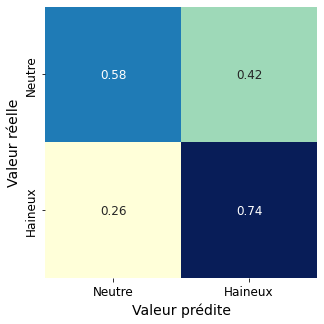

In [ ]:
draw_mat(conf_mat)